<a href="https://colab.research.google.com/github/ahoucbvtw/WeatherForecast/blob/main/Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install / Import Library**

In [13]:
!pip install neuralprophet

In [14]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

# **Read Data**

In [88]:
weather_df = pd.read_csv("weatherAUS.csv")
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Search all Location's value(No different) in weather_df
weather_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [5]:
# See all columns in weather_df
weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# See all column's data type in weather_df
weather_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# **Preprocess Data**

In [7]:
# Choose a City whitch You Want to Pridict(Here is Sydney)
sydney_df = weather_df[weather_df["Location"] == "Sydney"]

# Change "Date" column's datatype to datetime
sydney_df["Date"] = pd.to_datetime(sydney_df["Date"])

sydney_df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,SSE,22.0,20.0,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,ESE,20.0,7.0,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,N,15.0,13.0,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,W,17.0,19.0,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No
33519,2017-06-25,Sydney,7.6,19.3,0.0,3.4,9.4,W,35.0,W,W,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No


In [8]:
# Check the "Date" column was be changed to datetime type
sydney_df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

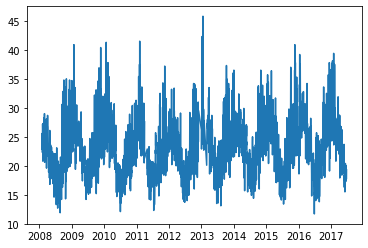

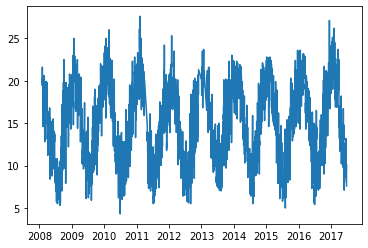

In [9]:
# Choose what you want predict column and check it will be no missing data
plt.plot(sydney_df["Date"], sydney_df["MaxTemp"])
plt.show()

plt.plot(sydney_df["Date"], sydney_df["MinTemp"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


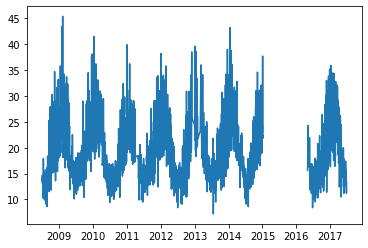

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


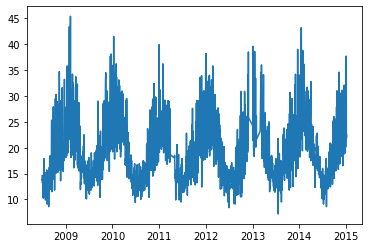

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,W,37.0,35.0,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No,2008
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,WSW,30.0,35.0,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes,2008
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,W,17.0,24.0,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No,2008
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,N,9.0,7.0,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No,2008
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,NNE,24.0,30.0,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No,2008


In [89]:
# If you choosed Melbourne, there is missing data in it.
# So must do data preprocess to cut the missing data.

# melb = weather_df[weather_df['Location']=='Melbourne']
# melb['Date'] = pd.to_datetime(melb['Date'])

# plt.plot(melb['Date'], melb['Temp3pm'])
# plt.show()

# melb['Year'] = melb['Date'].apply(lambda x: x.year)
# melb = melb[melb['Year']<=2015]
# plt.plot(melb['Date'], melb['Temp3pm'])
# plt.show()

# melb.head()

In [15]:
predict_sydney_maxtemp_df = sydney_df[["Date", "MaxTemp"]]
predict_sydney_maxtemp_df.dropna(inplace = True)
predict_sydney_maxtemp_df.columns = ["ds", "y"]
predict_sydney_maxtemp_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
30176,2008-02-01,22.4
30177,2008-02-02,25.6
30178,2008-02-03,24.5
30179,2008-02-04,22.8
30180,2008-02-05,25.7


In [11]:
predict_sydney_mintemp_df = sydney_df[["Date", "MinTemp"]]
predict_sydney_mintemp_df.dropna(inplace = True)
predict_sydney_mintemp_df.columns = ["ds", "y"]
predict_sydney_mintemp_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
30176,2008-02-01,19.5
30177,2008-02-02,19.5
30178,2008-02-03,21.6
30179,2008-02-04,20.2
30180,2008-02-05,19.7


# **Train Modle**

In [12]:
m = NeuralProphet()
predict_sydney_mintemp_model = m.fit(predict_sydney_mintemp_df, freq = "D", epochs = 2000)
predict_sydney_mintemp_model

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[2000/2000]: 100%|██████████| 2000/2000 [06:58<00:00,  4.78it/s, SmoothL1Loss=0.00563, MAE=1.72, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.202261,9.120663,0.0
1,0.009211,2.178916,0.0
2,0.007009,1.920819,0.0
3,0.006761,1.883438,0.0
4,0.006581,1.859649,0.0
...,...,...,...
1995,0.005629,1.719970,0.0
1996,0.005629,1.720096,0.0
1997,0.005629,1.719993,0.0
1998,0.005629,1.719965,0.0


In [16]:
s = NeuralProphet()
predict_sydney_maxtemp_model = s.fit(predict_sydney_maxtemp_df, freq = "D", epochs = 2000)
predict_sydney_maxtemp_model

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[2000/2000]: 100%|██████████| 2000/2000 [07:00<00:00,  4.76it/s, SmoothL1Loss=0.011, MAE=2.27, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.291199,12.280710,0.0
1,0.013450,2.588248,0.0
2,0.011738,2.360804,0.0
3,0.011651,2.340544,0.0
4,0.011648,2.358555,0.0
...,...,...,...
1995,0.011005,2.265810,0.0
1996,0.011004,2.265746,0.0
1997,0.011004,2.265919,0.0
1998,0.011003,2.265875,0.0


# **Forecast**

In [13]:
future_sydney_mintemp = m.make_future_dataframe(predict_sydney_mintemp_df, periods = 7)
forecast_sydney_mintemp = m.predict(future_sydney_mintemp)
forecast_sydney_mintemp

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2017-06-26,None,10.089442,NaN,15.404504,-5.257164,-0.057898
1,2017-06-27,None,10.083854,NaN,15.404801,-5.318645,-0.002304
2,2017-06-28,None,9.955153,NaN,15.405100,-5.378261,-0.071687
3,2017-06-29,None,10.067783,NaN,15.405398,-5.435905,0.098290
4,2017-06-30,None,9.977571,NaN,15.405696,-5.491478,0.063354
5,2017-07-01,None,9.868835,NaN,15.405994,-5.544896,0.007737
6,2017-07-02,None,9.772717,NaN,15.406292,-5.596083,-0.037493


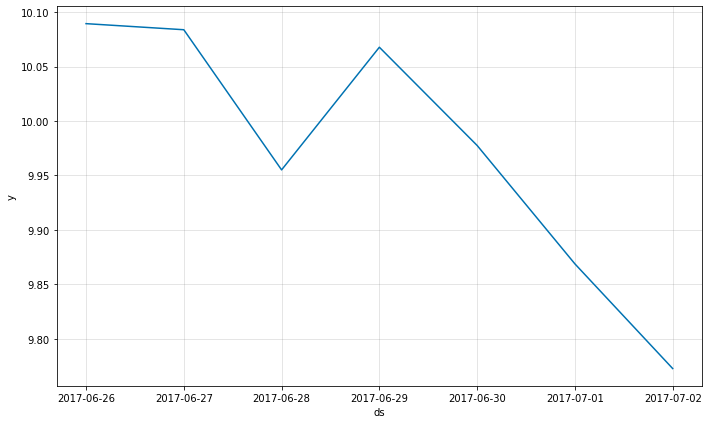

In [24]:
plot1 = m.plot(forecast_sydney_mintemp)

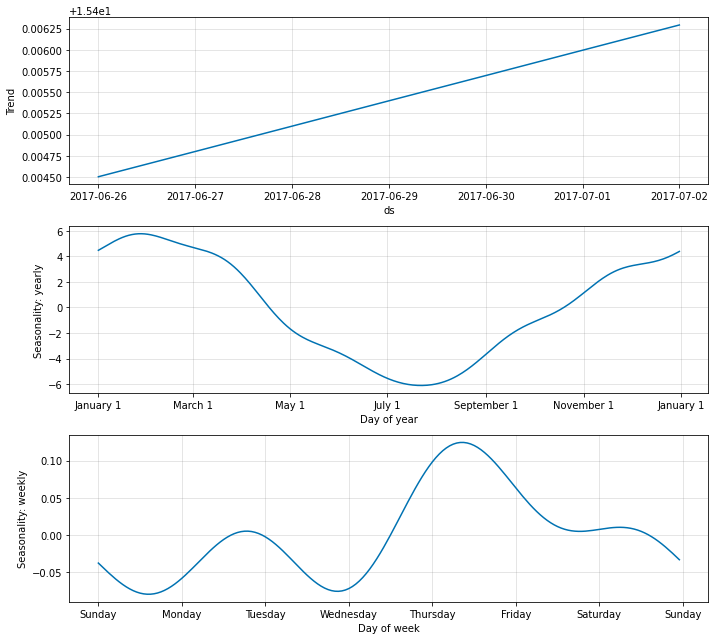

In [32]:
plt1_2 = m.plot_components(forecast_sydney_mintemp)

In [17]:
future_sydney_maxtemp = s.make_future_dataframe(predict_sydney_maxtemp_df, periods = 7)
forecast_sydney_maxtemp = s.predict(future_sydney_maxtemp)
forecast_sydney_maxtemp

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2017-06-26,None,18.311459,NaN,23.731995,-5.368599,-0.051935
1,2017-06-27,None,18.314260,NaN,23.732262,-5.372349,-0.045652
2,2017-06-28,None,18.238728,NaN,23.732531,-5.370995,-0.122808
3,2017-06-29,None,18.498909,NaN,23.732800,-5.364794,0.130906
4,2017-06-30,None,18.464794,NaN,23.733067,-5.354028,0.085755
5,2017-07-01,None,18.418182,NaN,23.733334,-5.339003,0.023851
6,2017-07-02,None,18.393442,NaN,23.733604,-5.320044,-0.020118


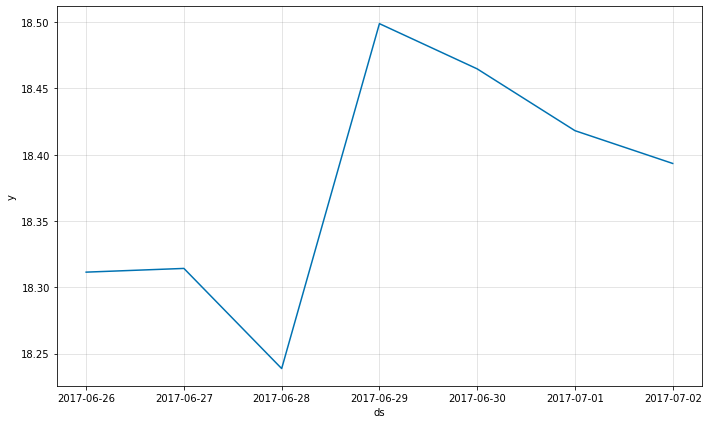

In [29]:
plot2 = s.plot(forecast_sydney_maxtemp)

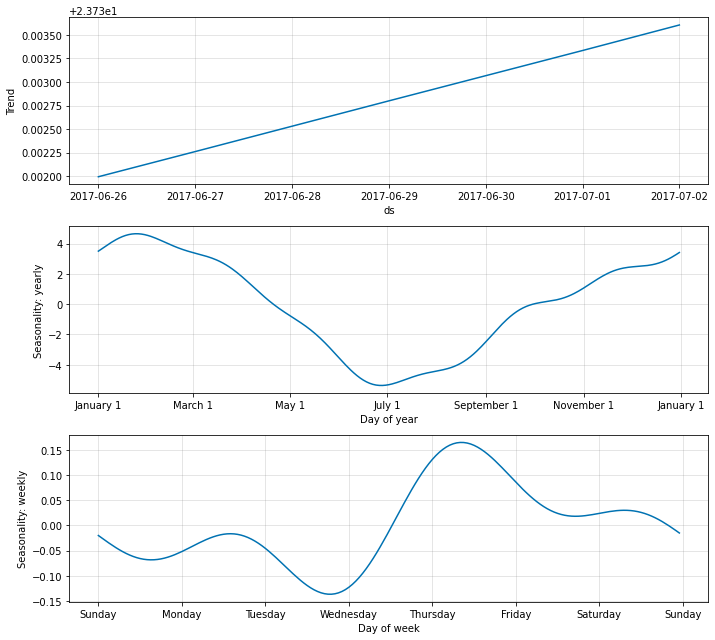

In [27]:
plt2_2 = s.plot_components(forecast_sydney_maxtemp)

# **Save model**

In [35]:
with open('saved_model_max.pkl', "wb") as f:
    pickle.dump(m, f)

In [37]:
with open('saved_model_min.pkl', "wb") as f:
    pickle.dump(s, f)

# **Load Model**

In [85]:
with open('saved_model_max.pkl', "rb") as f:
    m = pickle.load(f)

with open('saved_model_min.pkl', "rb") as f:
    s = pickle.load(f)